# Report on 2019 UN World Happiness Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv("C:/Users/qures/Downloads/worldhappiness2019.csv")

data.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
dataregion=pd.read_csv("C:/Users/qures/Downloads/region.csv")
dataregion.head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [5]:
datanew=pd.merge(data, dataregion, how='left', left_on='Country or region', right_on='name')
datanew.loc[pd.isnull(datanew).iloc[:,9]].to_csv("missing.csv",index=False)

y=datanew['Happiness_level']
X=datanew.drop(['Happiness_level'],axis=1)
X=X.drop(['name'],axis=1)
X=X.drop(['Country or region'],axis=1)
X=X.drop(['sub-region'],axis=1)

X.head()


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [6]:
y.head()

0    Very High
1    Very High
2    Very High
3    Very High
4    Very High
Name: Happiness_level, dtype: object

## Bivariate Visualization

In [7]:
import seaborn as sns

### GDP vs Happiness level

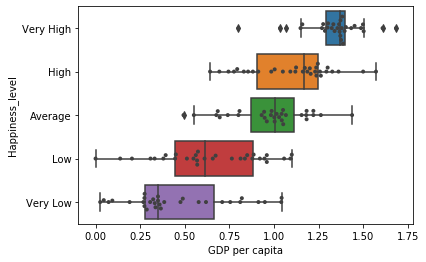

In [8]:
plot1=sns.boxplot(x="GDP per capita", y="Happiness_level", data=datanew)
plot1=sns.swarmplot(x="GDP per capita", y="Happiness_level", data=datanew, color =".25", size=4)

The median GDP per capita is highest in regions with Very High happiness levels and lowest in areas with Very Low happiness levels. 

### Healthy Life Expectancy vs Happiness level

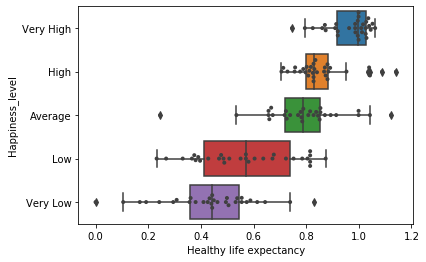

In [9]:
plot2=sns.boxplot(x="Healthy life expectancy", y="Happiness_level", data=datanew)
plot2=sns.swarmplot(x="Healthy life expectancy", y="Happiness_level", data=datanew, color =".25", size=4)

Again, the median Healthy life expectancy is highest in areas with higher happiness levels and lower in areas with lower happiness levels.

### Freedom to make life choices vs Happiness level

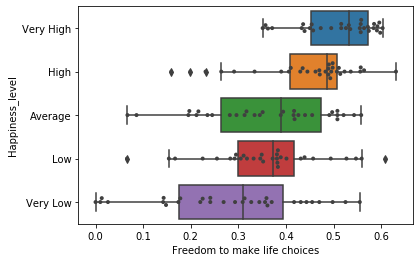

In [11]:
plot3=sns.boxplot(x="Freedom to make life choices", y="Happiness_level", data=datanew)
plot3=sns.swarmplot(x="Freedom to make life choices", y="Happiness_level", data=datanew, color =".25", size=4)

The trend in the media is the same as for previos two plots but there is higher variability in the above plot when it comes to Freedom to make life choice then it was for other plots as it relates to Happiness level.

In [12]:
table=pd.crosstab(index=datanew["region"], columns=datanew["Happiness_level"])

In [13]:
table

Happiness_level,Average,High,Low,Very High,Very Low
region,,,,,
Africa,4,1,18,0,22
Americas,2,12,1,7,1
Asia,15,9,10,5,7
Europe,10,10,2,17,1
Oceania,0,0,0,2,0


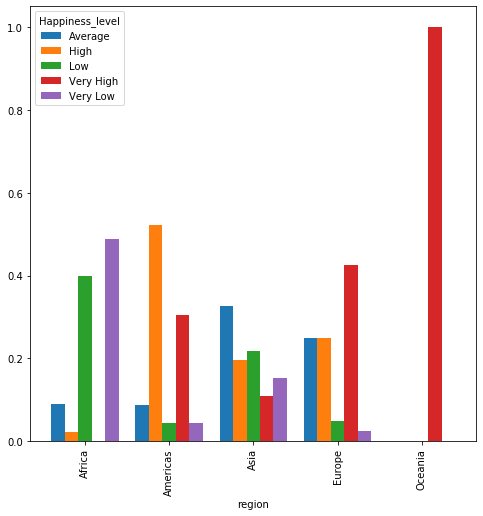

In [14]:
plot4=(table.div(table.sum(1),axis=0)).plot(kind="bar",figsize=(8,8),width=0.8)

The lowest variability is in Oceania region where all of the countries present high level of Happiness. 

Moreover Americas have more than 50 percent of the countries reporting high or very high level of happinessand Africa reporting more than 80% of countries with low or very low levels of happiness. 

## Feature Selection
### Examine Features that predict happiness through automatic feature selection models.

Below I have used two methods of feature selection. The first model uses the chi-squared statistics correlating two variables to examine which two variables are correlated the most. The scores for the top three features as they compare to the Happiness level are listed below. We see that the region is the best predictor of happiness level. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatureselection = SelectKBest(score_func=chi2, k=3)


datanew2=datanew
datanew2['region'].replace(['Africa','Americas','Asia','Europe','Oceania'],[1,2,3,4,5],inplace=True)
datanew2['Happiness_level'].replace(['Very High','High','Average','Low','Very Low'],[1,2,3,4,5],inplace=True)
y2=datanew2['Happiness_level']
X2=datanew2.drop(['Happiness_level'],axis=1)
X2=X2.drop(['name'],axis=1)
X2=X2.drop(['Country or region'],axis=1)
X2=X2.drop(['sub-region'],axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

fit = bestfeatureselection.fit(X2_train,y2_train)
fitscores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X2.columns)

featureScores = pd.concat([columns,fitscores],axis=1)
featureScores.columns = ['Features','Score'] 
print(featureScores.nlargest(3,'Score')) 

                  Features      Score
6                   region  25.718145
0           GDP per capita  14.696581
2  Healthy life expectancy   6.194121


Another model that selectsthe best feature uses linear support vector machines and correlates each of the variables to the target variable is listed below. We see that the best fit is created when we use the linear support vectors with 'region'.

In [17]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X2, y2)
model = SelectFromModel(lsvc, prefit=True)
X2_new = model.transform(X)
X2_new.shape

(156, 1)

In [18]:
print(X2_new[1:10])

[['Europe']
 ['Europe']
 ['Europe']
 ['Europe']
 ['Europe']
 ['Europe']
 ['Oceania']
 ['Americas']
 ['Europe']]


## Predicting World Happiness

### Preprocessing the data

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

numeric_features=X.columns.tolist()
numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region']


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



prediction_input_preprocessor=preprocessor.fit(X2_train) 

In [20]:
import pickle
pickle.dump(prediction_input_preprocessor, open( "preprocessor.pkl", "wb" ) )

In [21]:
prediction_input_preprocessor.transform(X2_train).shape

(117, 11)

### Model 1: K-Nearest Neighbors

We see below that when using Grid searchc to optimixe the n of the KNN model, the best value for the parameter we get is eight neighbors. The accuracy of the predicted model is 44%. 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 50, 1)} 

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)


grid.fit(X2_train, y2_train)


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X2_test, y2_test)))


best mean cross-validation score: 0.590
best parameters: {'n_neighbors': 8}
test-set score: 0.436


C:\Users\qures\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Model 2: Logistic Regression as a Multiclass Classifier

Logistic regression is traditionally preferred as a binary classifier but can be used in a multi-class model using either One vs rest setup or for allowing for cross-entropy loss. Below I have set multi_class= ',ultinomial' in my Logistic Regression model. This allows the model to use cross entropy loss to assign multiple categories to the dependent variable. 

The model did not perform very well. The accuracy score is 44%.

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class="multinomial",solver="lbfgs").fit(X2_train,y2_train)


print("Test set score: {:.3f}".format(logreg.score(X2_test, y2_test)))

Test set score: 0.436


### Model 3: Multi Layer Perceptron

As my last model I used a Multi Layer Perceptron using scikit learn and got an accuracy score of 59%.

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
modelMLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

In [27]:
modelMLP.fit(X2_train, y2_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
y_predMLP = modelMLP.predict(X2_test)

In [30]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y2_test, y_predMLP))

Accuracy: 0.5897435897435898


## Discussion

The data in question is rather small. Hence neither of the classifiers performed with an overwhelming accuracy. In general, the accuracy of a model improves as the data gets larger. Some other classifiers that I can try in subsequent iterations of the project include Random Forests and Naive Bayesian Classifer. 